In [1]:
import pandas as pd
import numpy as np
import csv, matplotlib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from dateutil.parser import parse
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


### Some Utility functions

In [ ]:

def getSentiment(sentence):
    '''
    This function will return polarity 
    scores given a sentence
    '''
    sid = SentimentIntensityAnalyzer()
    ps = sid.polarity_scores(str(sentence))
    return str(ps['compound'])

def parseUrl(url):
    '''
    This function returns categories in a url string
    '''
    return url.split('/')[2:5]

def getCategory(url):
    '''
    Extract category from url
    '''
    return parseUrl(url)[1]

def getCategory2(url):
    '''
    Extract sub category from url
    '''
    result = parseUrl(url)[2]
    if '-' in result:
        return '-'
    return result

def toDateObj(stri):
    try:
        return parse(stri)
    except:
        return None

### load data into pandas

In [3]:
data = pd.read_csv('NationMediaArticles.csv')
data.head()

,date,headline,paragraph,url,source
0,"May 21, 2015 at 07:11PM",Kenya loses over Sh600bn every year in tax eva...,Kenya loses an estimated Sh639 billion annuall...,http://www.nation.co.ke/business/Kenya-loses-o...,Daily Nation RSS Feeds: Home
1,"May 21, 2015 at 10:24PM","Fight hard, Munya told after winning top seat",Mr Mvurya bowed out of the race after the gove...,http://www.nation.co.ke/news/politics/Tough-ta...,Daily Nation RSS Feeds: Home
2,"August 28, 2015 at 07:16PM",How we clinched deal to supply veges to superm...,"The group brings together over 2,400 farmers w...",http://www.nation.co.ke/business/seedsofgold/H...,Daily Nation | Home
3,"August 28, 2015 at 07:20PM",Online fraudster leaves my lovely friends high...,"The chama, which largely operates on WhatsApp,...",http://www.nation.co.ke/business/seedsofgold/O...,Daily Nation | Home
4,"August 28, 2015 at 07:23PM",Mrenda is a revered vegetable at the Kakuma Re...,The farm ran by refugees is easy to pick out f...,http://www.nation.co.ke/business/seedsofgold/-...,Daily Nation | Home


### Sort by dates

In [4]:
data['datetime'] = data['date'].apply(toDateObj)
data.sort_values(by='datetime')
data.tail()

,date,headline,paragraph,url,source,datetime
61003,"November 22, 2014 at 04:22PM",LeBron James frustrated as struggling Cavalier...,Struggling to come together with consistent te...,http://www.nation.co.ke/sports/Basketball/LeBr...,Daily Nation RSS Feeds: Home,2014-11-22 16:22:00
61004,"November 22, 2014 at 04:39PM",Bodies of 28 Shabaab attack victims in Mandera...,Police said none of the 28 who died in the Al-...,http://www.nation.co.ke/counties/Bodies-28-Sha...,Daily Nation RSS Feeds: Home,2014-11-22 16:39:00
61005,"November 22, 2014 at 12:06PM",Death toll from Marsabit clashes rises to 10,The death toll from the Wednesday clashes betw...,http://www.nation.co.ke/counties/Death-toll-fr...,Daily Nation RSS Feeds: Home,2014-11-22 12:06:00
61006,"November 22, 2014 at 06:33PM",Survivor says Al-Shabaab gunmen fired in jubil...,One of passengers who survived the attack said...,http://www.nation.co.ke/counties/-/1107872/253...,Daily Nation RSS Feeds: Home,2014-11-22 18:33:00
61007,"November 22, 2014 at 08:38AM",At least 28 killed in suspected Shabaab attack...,Initial reports indicated that about a 100 arm...,http://www.nation.co.ke/counties/28-dead-suspe...,Daily Nation RSS Feeds: Home,2014-11-22 08:38:00


### Get politics sub category

In [58]:
data['category'] = data['url'].apply(getCategory)
data['subCategory'] = data['url'].apply(getCategory2)
news = data[data['subCategory'].isin(['politics'])].copy()
news.head()

,date,headline,paragraph,url,source,datetime,category,subCategory
0,"May 21, 2015 at 07:11PM",Kenya loses over Sh600bn every year in tax eva...,Kenya loses an estimated Sh639 billion annuall...,http://www.nation.co.ke/business/Kenya-loses-o...,Daily Nation RSS Feeds: Home,2015-05-21 19:11:00,business,-
2,"August 28, 2015 at 07:16PM",How we clinched deal to supply veges to superm...,"The group brings together over 2,400 farmers w...",http://www.nation.co.ke/business/seedsofgold/H...,Daily Nation | Home,2015-08-28 19:16:00,business,seedsofgold
3,"August 28, 2015 at 07:20PM",Online fraudster leaves my lovely friends high...,"The chama, which largely operates on WhatsApp,...",http://www.nation.co.ke/business/seedsofgold/O...,Daily Nation | Home,2015-08-28 19:20:00,business,seedsofgold
4,"August 28, 2015 at 07:23PM",Mrenda is a revered vegetable at the Kakuma Re...,The farm ran by refugees is easy to pick out f...,http://www.nation.co.ke/business/seedsofgold/-...,Daily Nation | Home,2015-08-28 19:23:00,business,seedsofgold
5,"August 28, 2015 at 07:28PM",Seven things you need to keep in mind on marke...,You should not attempt to put yourself in thei...,http://www.nation.co.ke/business/seedsofgold/S...,Daily Nation | Home,2015-08-28 19:28:00,business,seedsofgold


### Add sentiment column

In [59]:
news['sentiment'] = news['headline'].apply(getSentiment)
news.describe()

,date,headline,paragraph,url,source,datetime,category,subCategory,sentiment
count,5893,5743,5885,5893,5893,5893,5893,5893,5893
unique,4950,5616,5666,5823,2,4950,1,51,207
top,"July 21, 2014 at 03:00AM",Leaked memo reveals KCB Board pay,TENDER NOTICE,http://www.nation.co.ke/business/corporates/Le...,Daily Nation RSS Feeds: Home,2014-07-21 03:00:00,business,-,0.0
freq,29,7,52,7,5263,29,5893,4188,2894
first,NaN,NaN,NaN,NaN,NaN,2013-09-05 17:42:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2015-10-13 17:20:00,NaN,NaN,NaN


### Filter to November 2014 / December 2014

In [60]:
news2014 = news.copy()[news.copy().apply(lambda x: '2014' in x['date'] and 'november' in x['date'].lower() and float(x['sentiment']) != 0, axis=1)]
news2015 = news.copy()[news.copy().apply(lambda x: '2014' in x['date'] and 'december' in x['date'].lower() and float(x['sentiment']) != 0, axis=1)]
news2015.tail()

,date,headline,paragraph,url,source,datetime,category,subCategory,sentiment
56183,"December 14, 2014 at 10:23PM",News app for varsity students wins in Safarico...,The amounts will be disbursed on an agreed bas...,http://www.nation.co.ke/business/News-app-for-...,Daily Nation RSS Feeds: Home,2014-12-14 22:23:00,business,-,0.6124
56186,"December 14, 2014 at 10:24PM","Cut cost of consumer products, firms urged",Kenya has been dependent on hydro-electricity.,http://www.nation.co.ke/business/Firms-urged-t...,Daily Nation RSS Feeds: Home,2014-12-14 22:24:00,business,-,-0.2732
56307,"December 16, 2014 at 09:59PM",Uchumi rights issue meets high demand,Faida Investment Bank was the lead transaction...,http://www.nation.co.ke/business/Uchumi-rights...,Daily Nation RSS Feeds: Home,2014-12-16 21:59:00,business,-,-0.128
56315,"December 16, 2014 at 06:47PM",Export Processing Zones Authority (EPZA),INVITATION TO TENDER,http://www.nation.co.ke/business/tenders/-/239...,Daily Nation RSS Feeds: Home,2014-12-16 18:47:00,business,tenders,0.0772
56317,"December 16, 2014 at 06:46PM",The Kenya Airports Authority,TENDER ADVERTISEMENT NOTICE,http://www.nation.co.ke/business/tenders/-/239...,Daily Nation RSS Feeds: Home,2014-12-16 18:46:00,business,tenders,0.0772


In [61]:
list_of_datetimes2014 = [int(parse(x).day) for x in news2014['date']]
list_of_datetimes2015 = [int(parse(x).day) for x in news2015['date']]
#dates2014 = matplotlib.dates.date2num(list_of_datetimes2014)
#dates2015 = matplotlib.dates.date2num(list_of_datetimes2015)\

### Plot

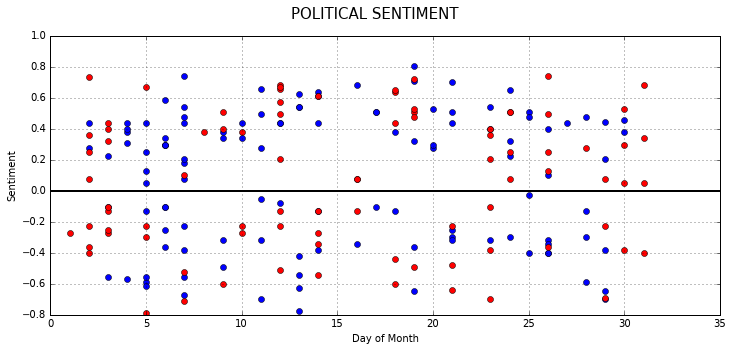

Daily Nation news headlines dataset:
Avarage sentiment(November 2014): 	 0.08
Avarage sentiment(December 2014): 	 0.06


In [62]:
fig = plt.figure(figsize=(12, 5), dpi=100)
ax = fig.gca()
#plt.plot_date(list_of_datetimes2014, news2014['sentiment'],'ro')
#plt.plot_date(list_of_datetimes2015, news2015['sentiment'],'bx')
plt.plot(list_of_datetimes2014, news2014['sentiment'],'bo')
plt.plot(list_of_datetimes2015, news2015['sentiment'],'ro')
plt.axhline(0, linewidth=2, color='black')
plt.xlabel("Day of Month")
fig.suptitle('POLITICAL SENTIMENT', fontsize=15)
plt.ylabel("Sentiment")
plt.grid()
plt.show()
print("Daily Nation news headlines dataset:")
print("Avarage sentiment(November 2014): \t",round(np.array([float(x) for x in news2014['sentiment']]).mean(), 2))
print("Avarage sentiment(December 2014): \t",round(np.array([float(x) for x in news2015['sentiment']]).mean(), 2))